In [120]:
import sys, os
import numpy as np

In [121]:
thisdir = os.path.dirname('__file__')
libpath = os.path.join(thisdir, '../c3dp_source')
if not libpath in sys.path:
    sys.path.insert(0, libpath)

In [122]:
import gauge_volume_allternateBlades as gv
import collimatorProperties_From_ChannelNumber as prop

In [123]:
sample_height=0.2 #mm
sample_width=1 #mm

arbitrary_height= sample_height+10.
arbitrary_width=sample_width+10.
# pointsNum_z=200
# pointsNum_y=50
stepsize=0.15
# zS=np.linspace(-sample_height/2., sample_height/2., num=pointsNum_z) #sample_positions_z vertical
# yS=np.linspace(-sample_width/2., sample_width/2., num=pointsNum_y) #sample_positions_y
zS=np.arange(-arbitrary_height/2., arbitrary_height/2., stepsize) #sample_positions_z vertical
yS=np.arange(-arbitrary_width/2., arbitrary_width/2., stepsize) #sample_positions_y
# xS=np.linspace(-sample_width/2., sample_width/2., num=pointsNum) #sample_positions_x
xS=0.

In [124]:
# misaligned_offset=0.5
# misaligned_zS=zS-misaligned_offset
# misaligned_yS=yS-misaligned_offset

In [125]:
m=np.array(np.meshgrid(xS,yS,zS))
m.shape

(3, 74, 1, 68)

In [126]:
m=m.transpose(1,2,3,0)
m.shape

(74, 1, 68, 3)

In [127]:
m.shape=-1,3
m.shape

(5032, 3)

In [128]:
print m

[[ 0.   -5.5  -5.1 ]
 [ 0.   -5.5  -4.95]
 [ 0.   -5.5  -4.8 ]
 ...
 [ 0.    5.45  4.65]
 [ 0.    5.45  4.8 ]
 [ 0.    5.45  4.95]]


In [129]:
length= 60.
offset_height=0.
offset_length=0.

In [151]:
### first part ####
collimator_inner_radius_1=70.
fst=prop.Collimator (number_of_chanels=3,blade_thickness=1,acceptanceAngle= 45, front_distance=collimator_inner_radius_1)
h_1 = fst.frontDimension_from_frontDistance()
channel_openningWidth_sample_1 = fst.channelThickness_From_channelNumber (h_1)
print (channel_openningWidth_sample_1)
channel_angular_size_1= gv.span2angle(channel_openningWidth_sample_1, collimator_inner_radius_1)
print (channel_angular_size_1)

collimator_outer_radius_1=length+collimator_inner_radius_1
channel_openningWidth_detector_1=(collimator_outer_radius_1*channel_openningWidth_sample_1)/collimator_inner_radius_1

Cs_cylinder_1 = gv.make_cylindrical_surface(collimator_inner_radius_1, channel_angular_size_1, channel_openningWidth_sample_1,length_misalignment_offset=offset_length, height_misalignment_offset=offset_height)
Cd_cylinder_1 = gv.make_cylindrical_surface(collimator_outer_radius_1, channel_angular_size_1, channel_openningWidth_detector_1,length_misalignment_offset=offset_length,height_misalignment_offset=offset_height )

17.996632910744434
14.650102129548424


In [152]:
### second part ####
collimator_inner_radius_2=collimator_inner_radius_1+length
scnd=prop.Collimator (number_of_chanels=9,blade_thickness=1,acceptanceAngle= 45, front_distance=collimator_inner_radius_2)
h_2 = scnd.frontDimension_from_frontDistance()
channel_openningWidth_sample_2 = scnd.channelThickness_From_channelNumber (h_2)
print (channel_openningWidth_sample_2)
channel_angular_size_2= gv.span2angle(channel_openningWidth_sample_2, collimator_inner_radius_2)
print (channel_angular_size_2)

collimator_outer_radius_2=length+collimator_inner_radius_2
channel_openningWidth_detector_2=(collimator_outer_radius_2*channel_openningWidth_sample_2)/collimator_inner_radius_2

Cs_cylinder_2 = gv.make_cylindrical_surface(collimator_inner_radius_2, channel_angular_size_2, channel_openningWidth_sample_2,length_misalignment_offset=offset_length, height_misalignment_offset=offset_height)
Cd_cylinder_2 = gv.make_cylindrical_surface(collimator_outer_radius_2, channel_angular_size_2, channel_openningWidth_detector_2,length_misalignment_offset=offset_length,height_misalignment_offset=offset_height )

10.855058468556079
4.7814464987941925


In [153]:
### third part ####
collimator_inner_radius_3=collimator_inner_radius_2+length
thrd=prop.Collimator (number_of_chanels=27,blade_thickness=1,acceptanceAngle= 45, front_distance=collimator_inner_radius_3)
h_3 = thrd.frontDimension_from_frontDistance()
channel_openningWidth_sample_3 = thrd.channelThickness_From_channelNumber (h_3)
print (channel_openningWidth_sample_3)
channel_angular_size_3= gv.span2angle(channel_openningWidth_sample_3, collimator_inner_radius_3)
print (channel_angular_size_3)

collimator_outer_radius_3=length+collimator_inner_radius_3
channel_openningWidth_detector_3=(collimator_outer_radius_3*channel_openningWidth_sample_3)/collimator_inner_radius_3

Cs_cylinder_3 = gv.make_cylindrical_surface(collimator_inner_radius_3, channel_angular_size_3, channel_openningWidth_sample_3,length_misalignment_offset=offset_length, height_misalignment_offset=offset_height)
Cd_cylinder_3 = gv.make_cylindrical_surface(collimator_outer_radius_3, channel_angular_size_3, channel_openningWidth_detector_3,length_misalignment_offset=offset_length,height_misalignment_offset=offset_height )

4.792635322288004
1.4451748328275644


In [154]:
sample_points = m

In [155]:
theta_phiS_1 = gv.theta_phi(Cs_cylinder_1, sample_points)
theta_phiD_1 = gv.theta_phi(Cd_cylinder_1, sample_points)

theta_phiS_2 = gv.theta_phi(Cs_cylinder_2, sample_points)
theta_phiD_2 = gv.theta_phi(Cd_cylinder_2, sample_points)

theta_phiS_3 = gv.theta_phi(Cs_cylinder_3, sample_points)
theta_phiD_3 = gv.theta_phi(Cd_cylinder_3, sample_points)

In [156]:
Syz=sample_points[:,[1,2]].T
Syz.shape

(2, 5032)

In [157]:
# sample_pos, gauge_volume = gv.gauge_volume(theta_phiS, theta_phiD, Syz)
sample_pos, gauge_volume = gv.combined_gauge_volume(theta_phiS_1, theta_phiD_1, theta_phiS_2, theta_phiD_2,theta_phiS_3, theta_phiD_3,Syz)

<IPython.core.display.Javascript object>


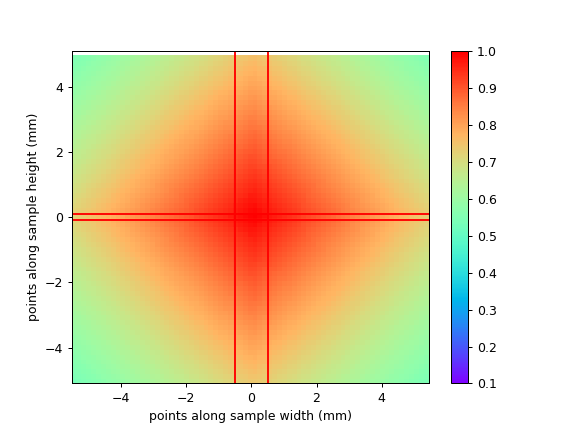

In [158]:
%matplotlib notebook
gv.making_plot(sample_pos, gauge_volume, arbitrary_height/2.,-arbitrary_height/2., sample_height, sample_width, min_color=0.1, max_color=1 )

In [138]:
sample_pos.shape

(2, 5032)

In [149]:
sample_pos_3, gauge_volume_3 = gv.gauge_volume(theta_phiS_3, theta_phiD_3, Syz)


<IPython.core.display.Javascript object>


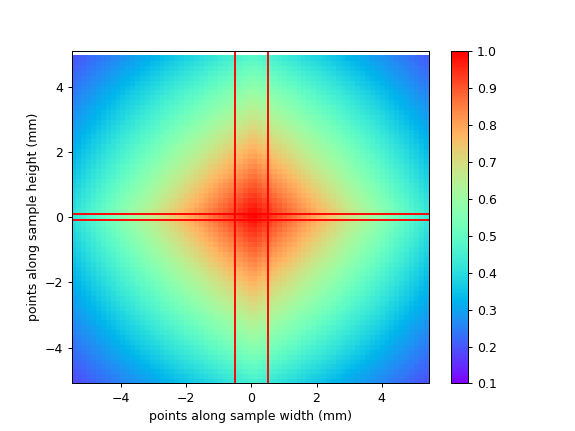

In [150]:
%matplotlib notebook
gv.making_plot(sample_pos_3, gauge_volume_3, arbitrary_height/2.,-arbitrary_height/2., sample_height, sample_width, min_color=0.1, max_color=1 )